# Earthquake Data Visualization with Pandas and charts

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:

POSTGRES_USER = os.environ.get("POSTGRES_USER")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD")
POSTGRES_DB = os.environ.get("POSTGRES_DB")
POSTGRES_HOST = os.environ.get("POSTGRES_HOST")
POSTGRES_PORT = os.environ.get("POSTGRES_PORT")

In [3]:
conn = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(conn)

In [72]:
query = "Select * from raw_data;"

df = pd.read_sql_query(query, conn)

df.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,179266.000000,179266.000000,179266.000000,179266.000000,179266.000000,179266
mean,89633.500000,2.155057,39.237392,-107.412495,34.089697,2023-06-10 09:46:40.691067648
min,1.000000,1.000000,-65.849700,-179.998700,-3.740000,2022-08-07 01:56:38
25%,44817.250000,1.300000,31.618908,-153.202375,5.520000,2023-01-01 22:09:46.500000
50%,89633.500000,1.800000,39.192200,-137.837500,10.000000,2023-06-03 02:58:08.500000
75%,134449.750000,2.500000,59.794475,-110.290333,35.000000,2023-11-13 23:40:36.249999872
max,179266.000000,7.800000,86.593900,179.999400,681.240000,2024-05-01 13:24:59
std,51749.781016,1.138508,23.119624,84.536307,65.793917,NaN


In [75]:
df2 = df

df2

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
0,1,00876812,nn00876812,"47 km E of Fort Bidwell, California","Fort Bidwell, California",United States,1.8,41.943700,-119.584700,0.90,2024-04-22 01:21:15,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
1,2,40554287,ci40554287,"18 km S of Joshua Tree, CA","Joshua Tree, California",United States,1.2,33.974167,-116.296167,8.45,2024-04-22 01:22:03,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2,3,02456who50,ak02456who50,"4 km SSE of Salcha, Alaska","Salcha, Alaska",United States,1.5,64.487500,-146.872900,3.50,2024-04-22 01:28:08,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
3,4,40554303,ci40554303,"2 km NNW of Gardena, CA","Gardena, California",United States,1.8,33.901500,-118.319167,13.35,2024-04-22 01:34:40,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
4,5,74180727,hv74180727,"4 km S of Pāhala, Hawaii","Pāhala, Hawaii",United States,1.8,19.161833,-155.470337,30.51,2024-04-22 01:40:56,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179261,179262,2024119008,pr2024119008,"78 km N of Cruz Bay, U.S. Virgin Islands",Cruz Bay,U.S. Virgin Islands,3.6,19.041800,-64.778300,31.00,2024-04-28 12:46:02,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179262,179263,93107846,av93107846,"61 km W of Adak, Alaska","Adak, Alaska",United States,1.3,51.788667,-177.510333,0.80,2024-04-28 11:45:26,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179263,179264,93107701,av93107701,"60 km W of Adak, Alaska","Adak, Alaska",United States,1.4,51.790667,-177.500167,2.55,2024-04-28 08:56:38,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179264,179265,74189362,hv74189362,"7 km S of Volcano, Hawaii","Volcano, Hawaii",United States,1.4,19.375667,-155.236500,0.10,2024-04-27 18:00:51,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By UTC time

In [76]:
df2.sort_values(by="utc_time", ascending=False).head()

# df2.sort_values(by="utc_time", ascending=False).tail()


,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
179117,179118,0245lzg8wd,ak0245lzg8wd,"69 km WNW of Aleneva, Alaska","Aleneva, Alaska",United States,1.6,58.277600,-154.008000,71.90,2024-05-01 13:24:59,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179118,179119,74203887,hv74203887,"6 km W of Volcano, Hawaii","Volcano, Hawaii",United States,1.8,19.434500,-155.291504,-1.16,2024-05-01 13:24:07,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179119,179120,74043791,nc74043791,"9 km NNW of Redwood Valley, CA","Redwood Valley, California",United States,1.3,39.339169,-123.254669,1.86,2024-05-01 13:09:36,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179120,179121,0245lz03w7,ak0245lz03w7,"70 km WNW of Beluga, Alaska","Beluga, Alaska",United States,2.3,61.469800,-152.197200,106.50,2024-05-01 12:49:30,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179121,179122,71447423,pr71447423,"7 km WSW of Guánica, Puerto Rico",Guánica,Puerto Rico,2.3,17.936167,-66.967167,9.71,2024-05-01 12:45:50,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Magnitude - highest to lowest

In [68]:
df2.sort_values(by="magnitude", ascending=False).head()

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
116921,116921,6000jllz,us6000jllz,"Pazarcik earthquake, Kahramanmaras earthquake ...",Pazarcik earthquake,Kahramanmaras earthquake sequence,7.8,37.2256,37.0143,10.00,2023-02-06 01:17:34,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
164001,164002,7000i9bw,us7000i9bw,"35 km SSW of Aguililla, Mexico",Aguililla,Mexico,7.6,18.4552,-102.9561,26.94,2022-09-19 18:05:08,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
161515,161516,6000iitd,us6000iitd,"70 km E of Kainantu, Papua New Guinea",Kainantu,Papua New Guinea,7.6,-6.2944,146.5038,116.00,2022-09-10 23:47:00,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
90511,90512,6000kawn,us6000kawn,"82 km WNW of Hihifo, Tonga",Hihifo,Tonga,7.6,-15.6278,-174.4925,210.00,2023-05-10 16:02:00,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
126085,126086,7000j36j,us7000j36j,"Pulau Pulau Tanimbar, Indonesia",Pulau Pulau Tanimbar,Indonesia,7.6,-7.0586,130.0090,104.95,2023-01-09 17:47:35,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Depth

In [69]:
df2.sort_values(by="depth", ascending=False).head()

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
115532,115532,6000k2db,us6000k2db,"208 km ENE of Sola, Vanuatu",Sola,Vanuatu,4.0,-13.1462,169.3241,681.24,2023-04-01 18:09:17,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
136203,136204,6000j9sk,us6000j9sk,"289 km SE of Levuka, Fiji",Levuka,Fiji,4.4,-20.1457,-179.0153,654.11,2022-12-16 16:20:31,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
126961,126962,7000j5u1,us7000j5u1,"272 km SE of Levuka, Fiji",Levuka,Fiji,4.2,-19.9726,-179.0447,654.01,2023-01-12 19:14:56,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
177854,177855,7000i7e2,us7000i7e2,"216 km ESE of Levuka, Fiji",Levuka,Fiji,4.4,-18.8720,-178.8200,653.59,2022-09-04 22:39:49,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
75802,75802,6000kq6n,us6000kq6n,"209 km SE of Levuka, Fiji",Levuka,Fiji,4.7,-19.3261,-179.1976,653.52,2023-07-05 09:56:51,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Copy existing dataframe

In [79]:
df_copy = df2

In [80]:
df_copy.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,179266.000000,179266.000000,179266.000000,179266.000000,179266.000000,179266
mean,89633.500000,2.155057,39.237392,-107.412495,34.089697,2023-06-10 09:46:40.691067648
min,1.000000,1.000000,-65.849700,-179.998700,-3.740000,2022-08-07 01:56:38
25%,44817.250000,1.300000,31.618908,-153.202375,5.520000,2023-01-01 22:09:46.500000
50%,89633.500000,1.800000,39.192200,-137.837500,10.000000,2023-06-03 02:58:08.500000
75%,134449.750000,2.500000,59.794475,-110.290333,35.000000,2023-11-13 23:40:36.249999872
max,179266.000000,7.800000,86.593900,179.999400,681.240000,2024-05-01 13:24:59
std,51749.781016,1.138508,23.119624,84.536307,65.793917,NaN


In [87]:
index_to_drop = df_copy[~df_copy["place"].str.contains(",", na=False)].index

cleaned_df = df_copy.drop(index_to_drop)

cleaned_df

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
0,1,00876812,nn00876812,"47 km E of Fort Bidwell, California","Fort Bidwell, California",United States,1.8,41.943700,-119.584700,0.90,2024-04-22 01:21:15,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
1,2,40554287,ci40554287,"18 km S of Joshua Tree, CA","Joshua Tree, California",United States,1.2,33.974167,-116.296167,8.45,2024-04-22 01:22:03,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2,3,02456who50,ak02456who50,"4 km SSE of Salcha, Alaska","Salcha, Alaska",United States,1.5,64.487500,-146.872900,3.50,2024-04-22 01:28:08,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
3,4,40554303,ci40554303,"2 km NNW of Gardena, CA","Gardena, California",United States,1.8,33.901500,-118.319167,13.35,2024-04-22 01:34:40,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
4,5,74180727,hv74180727,"4 km S of Pāhala, Hawaii","Pāhala, Hawaii",United States,1.8,19.161833,-155.470337,30.51,2024-04-22 01:40:56,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179261,179262,2024119008,pr2024119008,"78 km N of Cruz Bay, U.S. Virgin Islands",Cruz Bay,U.S. Virgin Islands,3.6,19.041800,-64.778300,31.00,2024-04-28 12:46:02,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179262,179263,93107846,av93107846,"61 km W of Adak, Alaska","Adak, Alaska",United States,1.3,51.788667,-177.510333,0.80,2024-04-28 11:45:26,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179263,179264,93107701,av93107701,"60 km W of Adak, Alaska","Adak, Alaska",United States,1.4,51.790667,-177.500167,2.55,2024-04-28 08:56:38,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
179264,179265,74189362,hv74189362,"7 km S of Volcano, Hawaii","Volcano, Hawaii",United States,1.4,19.375667,-155.236500,0.10,2024-04-27 18:00:51,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


In [138]:
cleaned_df.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,166539.000000,166539.000000,166539.000000,166539.000000,166539.000000,166539
mean,88747.673770,2.076672,40.847823,-110.302078,31.294570,2023-06-13 19:24:26.566575872
min,1.000000,1.000000,-57.174700,-179.998700,-3.740000,2022-08-07 01:56:38
25%,42982.500000,1.300000,31.709060,-153.385150,5.250000,2023-01-03 21:01:58
50%,88512.000000,1.700000,39.516000,-140.685900,10.110000,2023-06-07 12:57:19
75%,133902.500000,2.400000,59.861100,-112.838417,35.000000,2023-11-21 14:05:58.500000
max,179266.000000,7.800000,79.295100,179.999400,681.240000,2024-05-01 13:24:59
std,52068.574638,1.067663,20.412165,81.791623,53.955096,NaN


When interpreting correlation coefficients, the values range from -1 to 1:

- 1 indicates a perfect positive correlation: As one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation: As one variable increases, the other variable decreases proportionally.
- 0 indicates no linear correlation: There is no linear relationship between the variables.

More explaination on correlation at this [correlation-matrix article](https://builtin.com/data-science/correlation-matrix)

In [167]:
cleaned_df[["magnitude", "depth"]].corr()

,magnitude,depth
magnitude,1.000000,0.296152
depth,0.296152,1.000000


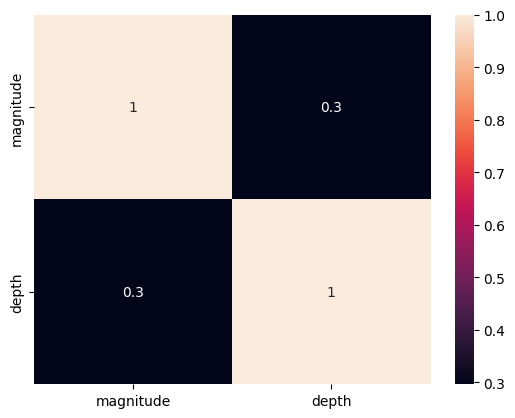

In [170]:
sns.heatmap(cleaned_df[["magnitude", "depth"]].corr(), annot=True)
plt.show()

- The correlation coefficient between "magnitude" and "magnitude" is 1, which is a perfect positive correlation. This is expected since a variable is always perfectly correlated with itself.
- The correlation coefficient between "depth" and "depth" is 1, indicating a perfect positive correlation, as expected.
- The correlation coefficient between "magnitude" and "depth" is 0.296152. This positive value indicates a positive correlation, but it's not close to 1, indicating a weak positive linear relationship between magnitude and depth.

In [168]:
cleaned_df[["magnitude", "depth", "latitude", "longitude"]].corr()

,magnitude,depth,latitude,longitude
magnitude,1.000000,0.296152,-0.582706,0.672386
depth,0.296152,1.000000,-0.117502,0.126228
latitude,-0.582706,-0.117502,1.000000,-0.488058
longitude,0.672386,0.126228,-0.488058,1.000000


- **Magnitude and Depth**: 
  - There is a weak positive correlation (0.296152) between magnitude and depth, indicating that there is a tendency for earthquakes with higher magnitudes to occur at slightly greater depths. However, the correlation is not strong.
- **Magnitude and Latitude**: 
  - There is a moderate negative correlation (-0.582706) between magnitude and latitude. This suggests that earthquakes with higher magnitudes tend to occur at lower latitudes (closer to the equator) and vice versa.
- **Magnitude and Longitude**: 
  - There is a strong positive correlation (0.672386) between magnitude and longitude. This indicates that earthquakes with higher magnitudes tend to occur at specific longitudes, and as longitude increases, the magnitude of earthquakes tends to increase as well.
- **Depth and Latitude**: 
  - There is a weak negative correlation (-0.117502) between depth and latitude, suggesting that there is a slight tendency for deeper earthquakes to occur at lower latitudes, but the correlation is not strong.
- **Depth and Longitude**: 
  - There is a weak positive correlation (0.126228) between depth and longitude, indicating a slight tendency for deeper earthquakes to occur at specific longitudes, but the correlation is not strong.
- **Latitude and Longitude**: 
  - There is a moderate negative correlation (-0.488058) between latitude and longitude, suggesting that earthquakes tend to occur at specific latitudes and longitudes. This could indicate geological features or fault lines influencing the distribution of earthquakes.

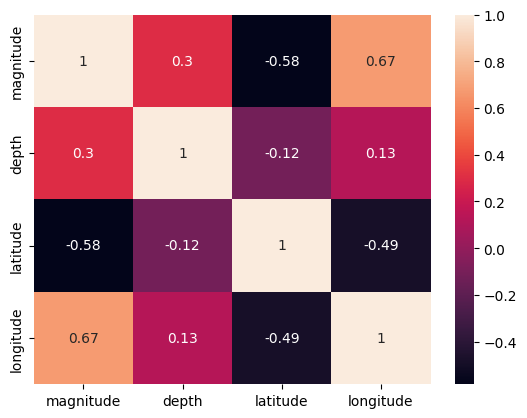

In [169]:
sns.heatmap(cleaned_df[["magnitude", "depth", "latitude", "longitude"]].corr(), annot=True)
plt.show()

In [139]:
cleaned_df.columns

Index(['id', 'code', 'event_id', 'place', 'city', 'country', 'magnitude',
       'latitude', 'longitude', 'depth', 'utc_time', 'url', 'details'],
      dtype='object')

In [164]:
cleaned_df["country"] = cleaned_df["country"].str.replace("region", " ")

cleaned_df["country"] = cleaned_df["country"].str.strip()

cleaned_df["country"].str.contains("region").sum()

0

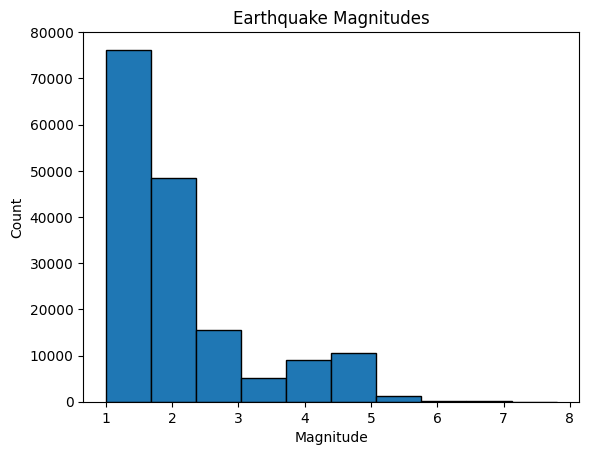

In [141]:
plt.hist(cleaned_df["magnitude"], bins=10, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Earthquake Magnitudes")
plt.show()

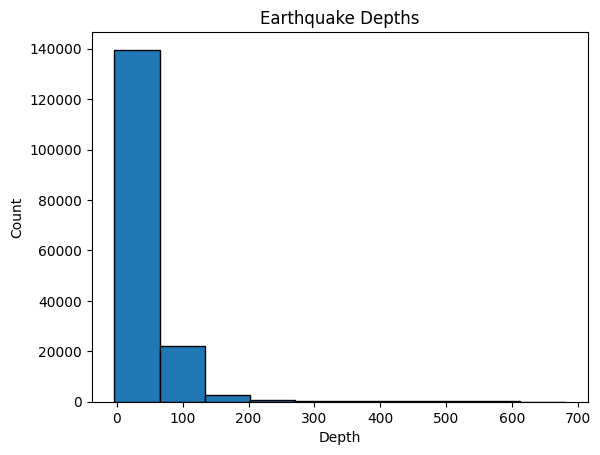

In [127]:
plt.hist(cleaned_df["depth"], bins=10, edgecolor="black")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.title("Earthquake Depths")
plt.show()

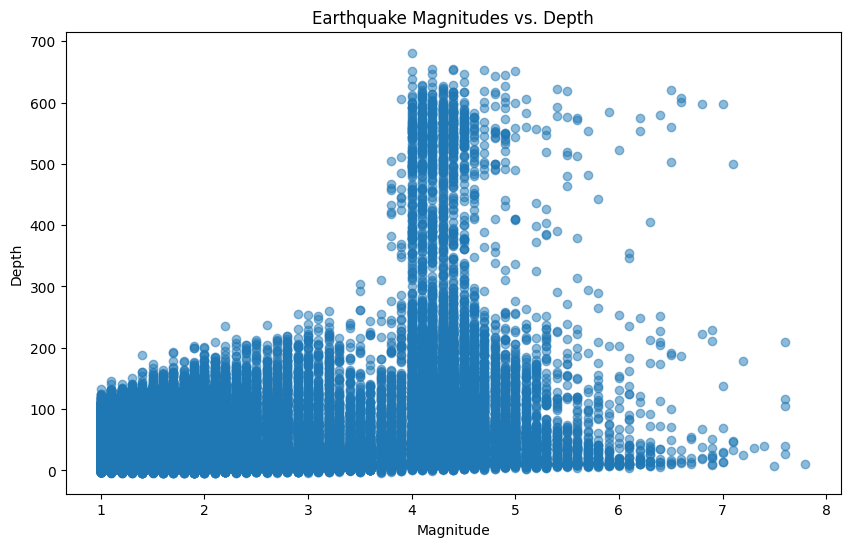

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df["magnitude"], cleaned_df["depth"], alpha=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Earthquake Magnitudes vs. Depth")
plt.show()

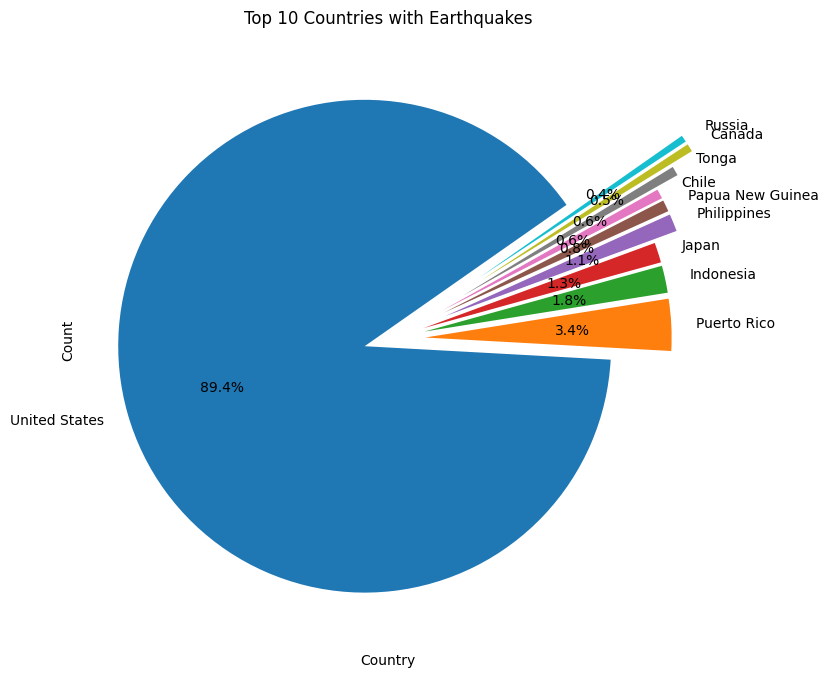

In [185]:
country_counts = cleaned_df["country"].value_counts().head(10)

explode = (0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.45, 0.45)

plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, explode=explode,autopct='%1.1f%%', startangle=35)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Countries with Earthquakes")
plt.show()


In [17]:
engine.dispose()